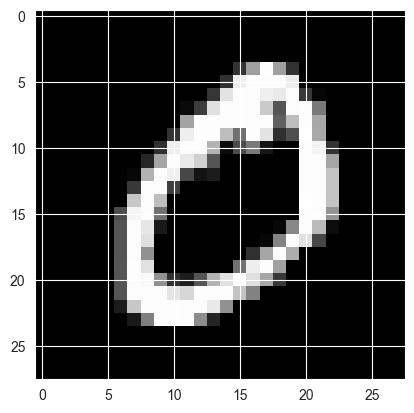

In [48]:
import matplotlib.pyplot as plt

from catboost import CatBoostClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import f1_score
import seaborn as sns
import pandas as pd
import numpy as np

with np.load('mnist.npz', allow_pickle=True) as f:
    X_train, y_train = f['x_train'], f['y_train']
    X_test, y_test = f['x_test'], f['y_test']
sample = 1
image = X_train[sample]
fig = plt.figure
plt.imshow(image, cmap='gray')
plt.show()
X_train = X_train.reshape(X_train.shape[0], 28 * 28)
X_test = X_test.reshape(X_test.shape[0], 28 * 28)



In [2]:
from tensorflow.keras import Sequential, Input
from tensorflow.keras.layers import Dense, Activation, Dropout
from keras.src.utils import to_categorical

n_estimators_range = range(1, 50, 1)
f_train_cb = []
f_test_cb = []
for n in n_estimators_range:
    cat_boost = CatBoostClassifier(n_estimators=n)
    cat_boost.fit(X_train, y_train)
    Y_predict_train = cat_boost.predict(X_train)
    Y_predict_test = cat_boost.predict(X_test)
    f_train_cb.append(f1_score(y_train, Y_predict_train, average='micro'))
    f_test_cb.append(f1_score(y_test, Y_predict_test, average='micro'))

plt.plot(n_estimators_range, f_train_cb)
plt.plot(n_estimators_range, f_test_cb)
plt.title("F мера для градиентного бустинга на основе MNIST")
plt.xlabel('n_estimators')
plt.ylabel('F-мера')
plt.legend(['f_train', 'f_test'])
plt.show()


Learning rate set to 0.5
0:	learn: 1.3551170	total: 327ms	remaining: 0us


KeyboardInterrupt: 

In [49]:
def map(data):
    output = []
    for i in range(len(data)):
        if data[i][0] > data[i][1]:
            output.append(0)
        else:
            output.append(1)
    return output


model = CatBoostClassifier(n_estimators=50)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

y_pred = to_categorical(y_pred.reshape(-1), 10)

# y_test_labels = np.argmax(y_test_check, axis=1)
# y_pred_tr = np.argmax(y_pred, axis=1)
# 
# confusion_matrix_ = confusion_matrix(y_test_check, y_pred_tr)
# cm = pd.DataFrame(data=confusion_matrix_, columns=['0', '1', '2', '3', '4',
#                                                    '5', '6', '7', '8', '9'],
#                   index=['0', '1', '2', '3', '4', '5', '6', '7', '8', '9'])
# ax = sns.heatmap(cm, annot=True, fmt="d")

Learning rate set to 0.5
0:	learn: 1.3551170	total: 279ms	remaining: 13.7s
1:	learn: 0.9974693	total: 552ms	remaining: 13.3s
2:	learn: 0.8003425	total: 830ms	remaining: 13s
3:	learn: 0.6849849	total: 1.12s	remaining: 12.9s
4:	learn: 0.6007907	total: 1.42s	remaining: 12.8s
5:	learn: 0.5256858	total: 1.69s	remaining: 12.4s
6:	learn: 0.4760302	total: 2.03s	remaining: 12.5s
7:	learn: 0.4343172	total: 2.36s	remaining: 12.4s
8:	learn: 0.4030223	total: 2.67s	remaining: 12.2s
9:	learn: 0.3686097	total: 2.98s	remaining: 11.9s
10:	learn: 0.3449471	total: 3.27s	remaining: 11.6s
11:	learn: 0.3224224	total: 3.55s	remaining: 11.3s
12:	learn: 0.3088932	total: 3.88s	remaining: 11s
13:	learn: 0.2947368	total: 4.21s	remaining: 10.8s
14:	learn: 0.2842852	total: 4.53s	remaining: 10.6s
15:	learn: 0.2765093	total: 4.89s	remaining: 10.4s
16:	learn: 0.2677842	total: 5.22s	remaining: 10.1s
17:	learn: 0.2634152	total: 5.59s	remaining: 9.94s
18:	learn: 0.2541944	total: 5.91s	remaining: 9.65s
19:	learn: 0.2471519

In [50]:

y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)
NB_CLASSES = y_train.shape[1]
INPUT_SHAPE = (X_train.shape[1],)
model = Sequential()
model.add(Input(shape=INPUT_SHAPE))
model.add(Dense(32))
model.add(Activation('relu'))
model.add(Dropout(0.3))
model.add(Dense(16))
model.add(Activation('relu'))
model.add(Dense(8))
model.add(Activation('relu'))
model.add(Dense(NB_CLASSES))
model.add(Activation('softmax'))
model.summary()




Model: "sequential_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_28 (Dense)                │ (None, 32)             │        25,120 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_28 (Activation)      │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_7 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_29 (Dense)                │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_29 (Activation)      │ (None, 16)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_30 (Dense)                │ (None, 8)              │           136 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_30 (Activation)      │ (None, 8)              │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_31 (Dense)                │ (None, 10)             │            90 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_31 (Activation)      │ (None, 10)             │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 25,874 (101.07 KB)

 Trainable params: 25,874 (101.07 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/30
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 393us/step - Precision: 0.8019 - Recall: 0.0841 - loss: 0.2468 - val_Precision: 0.9777 - val_Recall: 0.0747 - val_loss: 0.2380
Epoch 2/30
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 348us/step - Precision: 0.7838 - Recall: 0.0801 - loss: 0.2471 - val_Precision: 0.9762 - val_Recall: 0.0739 - val_loss: 0.2358
Epoch 3/30
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 349us/step - Precision: 0.7950 - Recall: 0.0796 - loss: 0.2456 - val_Precision: 0.9185 - val_Recall: 0.0856 - val_loss: 0.2336
Epoch 4/30
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 346us/step - Precision: 0.7772 - Recall: 0.0838 - loss: 0.2463 - val_Precision: 0.8875 - val_Recall: 0.1018 - val_loss: 0.2318
Epoch 5/30
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 351us/step - Precision: 0.7502 - Recall: 0.0925 - loss: 0.2448 - val_Precision: 0.8833 - val_Recall: 0.0810 - val_loss: 0.2376
Epoch 6/30
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 353us/step - Precision: 0.7638 - Recall: 0.0874 - loss: 0.2453 - val_Precision: 0.9342 - val_Re

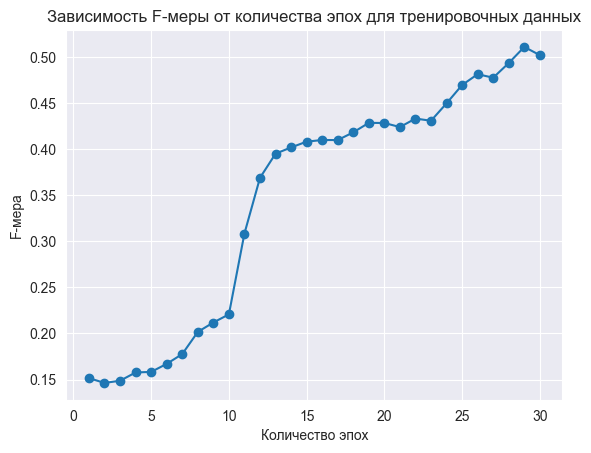

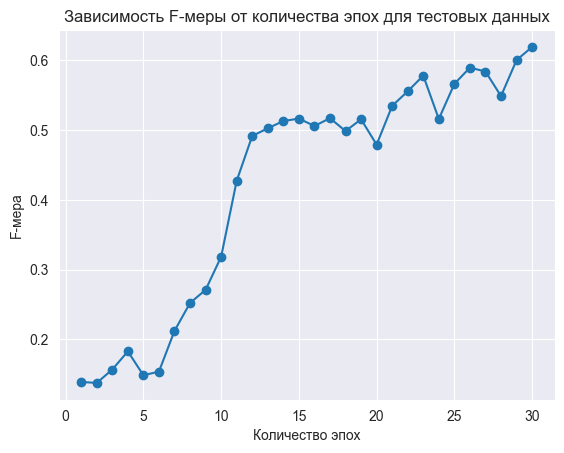

In [52]:

model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['Precision', 'Recall'])
EPOCHS = 30
history = model.fit(X_train, y_train, batch_size=32, epochs=EPOCHS, verbose=
1, validation_data=(X_test, y_test))
f1_score_list_train = []
f1_score_list_test = []
for i in range(EPOCHS):
    f1_score_list_train.append(2 * history.history['Precision'][i] * history.history['Recall'][i] / (history.history['Precision'][i] + history.history['Recall'][i]))
    f1_score_list_test.append(2 * history.history['val_Precision'][i] * history.history['val_Recall'][i] / (history.history['val_Precision'][i] + history.history['val_Recall'][i]))
    
plt.plot(range(1, EPOCHS+1), f1_score_list_train, marker='o')
plt.xlabel('Количество эпох')
plt.ylabel('F-мера')
plt.title('Зависимость F-меры от количества эпох для тренировочных данных')
plt.grid(True)
plt.show()

plt.plot(range(1, EPOCHS+1), f1_score_list_test, marker='o')
plt.xlabel('Количество эпох')
plt.ylabel('F-мера')
plt.title('Зависимость F-меры от количества эпох для тестовых данных')
plt.grid(True)
plt.show()

In [53]:
from sklearn.metrics import confusion_matrix, classification_report

def map(data):
  output = []
  for i in range(len(data)):
      for j in range(len(data[i])):
        if data[i][j] > 0.5:
          data[i][j] = 1.0
        else:
          data[i][j] = 0.0
  return data

y_pred = model.predict(X_test)

print(y_pred)

y_pred_thresholded = map(y_pred)

print(y_pred)

confusion_matrix_ = classification_report(y_test, y_pred)
print(confusion_matrix_)
cm = pd.DataFrame(data = confusion_matrix_, columns = ['0', '1', '2', '3', '4',
'5', '6', '7', '8', '9'], index = ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9'])
ax = sns.heatmap(cm, annot=True, fmt="d")

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 241us/step
[[4.9353890e-22 4.0748753e-07 1.9594921e-07 ... 9.9973243e-01
  4.3292117e-10 2.6495816e-04]
 [3.4131620e-02 2.6542365e-04 8.1252140e-01 ... 2.0148749e-03
  7.2341204e-02 3.8689245e-06]
 [2.3567593e-02 5.7864338e-01 2.6857570e-02 ... 2.8861916e-02
  7.0481949e-02 3.3509139e-02]
 ...
 [7.8367710e-05 1.3726640e-03 1.0689837e-02 ... 1.6565181e-02
  7.5780917e-03 3.6628422e-01]
 [2.3567593e-02 5.7864338e-01 2.6857570e-02 ... 2.8861916e-02
  7.0481949e-02 3.3509139e-02]
 [9.0205297e-02 3.7992009e-05 1.5293717e-02 ... 8.8605954e-04
  3.9117383e-03 8.7656174e-03]]
[[0. 0. 0. ... 1. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
              precision    recall  f1-score   support

           0       0.92      0.69      0.79       980
           1       0.76      0.96      0.85      1135
           2       0.72      0.46      0.56      1032
           3       0

/Users/sesh/Documents/neyro/gpt/.venv/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/sesh/Documents/neyro/gpt/.venv/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


ValueError: could not convert string to float: '              precision    recall  f1-score   support\n\n           0       0.92      0.69      0.79       980\n           1       0.76      0.96      0.85      1135\n           2       0.72      0.46      0.56      1032\n           3       0.46      0.61      0.52      1010\n           4       0.54      0.88      0.67       982\n           5       0.00      0.00      0.00       892\n           6       0.82      0.87      0.84       958\n           7       0.95      0.87      0.91      1028\n           8       0.00      0.00      0.00       974\n           9       0.74      0.07      0.13      1009\n\n   micro avg       0.70      0.55      0.62     10000\n   macro avg       0.59      0.54      0.53     10000\nweighted avg       0.60      0.55      0.54     10000\n samples avg       0.55      0.55      0.55     10000\n'